In [67]:
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster
from scipy.stats import pearsonr

In [68]:
data = requests.get("https://www.fruityvice.com/api/fruit/all")
results = json.loads(data.text)
# Normalising the JSON columns
df = pd.json_normalize(results)
# Sorting the DataFrame in Alphabetical Order
sortedDF = df.sort_values(by='name')
sortedDF

,name,id,family,order,genus,nutritions.calories,nutritions.fat,nutritions.sugar,nutritions.carbohydrates,nutritions.protein
22,Apple,6,Rosaceae,Rosales,Malus,52,0.40,10.30,11.40,0.30
24,Apricot,35,Rosaceae,Rosales,Prunus,15,0.10,3.20,3.90,0.50
35,Avocado,84,Lauraceae,Laurales,Persea,160,14.66,0.66,8.53,2.00
2,Banana,1,Musaceae,Zingiberales,Musa,96,0.20,17.20,22.00,1.00
6,Blackberry,64,Rosaceae,Rosales,Rubus,40,0.40,4.50,9.00,1.30
21,Blueberry,33,Rosaceae,Rosales,Fragaria,29,0.40,5.40,5.50,0.00
38,Cherry,9,Rosaceae,Rosales,Prunus,50,0.30,8.00,12.00,1.00
37,Cranberry,87,Ericaceae,Ericales,Vaccinium,46,0.10,4.00,12.20,0.40
31,Dragonfruit,80,Cactaceae,Caryophyllales,Selenicereus,60,1.50,8.00,9.00,9.00
5,Durian,60,Malvaceae,Malvales,Durio,147,5.30,6.75,27.10,1.50


In [74]:
# Display the Nutrition information to the user
def nutrition_information(user_input, calories, fat, sugar, carbohydrates, protein):
    print(user_input, "Nutrition Information:  \n")
    print("Calories: ", calories, "kcal")
    print("Fat: ", fat, "grams")
    print("Sugar: ", sugar, "grams")
    print("Carbohydrates: ", carbohydrates, "grams")
    print("Protein: ", protein, "grams")    

In [75]:
# Given a fruit as input, return it's corresponding nutrition information
user_input = input('What is the name of the fruit?')
# Making a df with the input provided by the user
fruit_row = df[df["name"] == user_input]
# If the dataframe is not empty...
if not fruit_row.empty:
    sugar = fruit_row.iloc[0]['nutritions.sugar']
    protein = fruit_row.iloc[0]['nutritions.protein']
    carbs = fruit_row.iloc[0]['nutritions.carbohydrates']
    fat = fruit_row.iloc[0]['nutritions.fat']
    calories = fruit_row.iloc[0]['nutritions.calories']
    nutrition_information(user_input, calories, fat, sugar, carbs, protein)
else:
    print("Fruit was not found in our database")

Kiwi Nutrition Information:  

Calories:  61 kcal
Fat:  0.5 grams
Sugar:  9.0 grams
Carbohydrates:  15.0 grams
Protein:  1.1 grams


In [76]:
# Check the correlation between nutritional information
df.corr()

/var/folders/9_/rlghh8fd3359p816pns4bgw40000gn/T/ipykernel_11645/1961864931.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,id,nutritions.calories,nutritions.fat,nutritions.sugar,nutritions.carbohydrates,nutritions.protein
id,1.000000,0.185943,0.211903,0.014030,0.140247,0.245899
nutritions.calories,0.185943,1.000000,0.693418,0.329004,0.679389,0.243130
nutritions.fat,0.211903,0.693418,1.000000,-0.245799,0.050344,0.211696
nutritions.sugar,0.014030,0.329004,-0.245799,1.000000,0.700420,0.018569
nutritions.carbohydrates,0.140247,0.679389,0.050344,0.700420,1.000000,0.075899
nutritions.protein,0.245899,0.243130,0.211696,0.018569,0.075899,1.000000


In [29]:
# User chooses letter a) Calories vs. Carbohydrates and Calories vs. Sugar

def option_a(fig, axes):
    x = df['nutritions.calories']
    y = df['nutritions.carbohydrates']

    # Compute regression line 
    regression_line(x, y)

    # Plotting Calories vs. Carbohydrates
    axes[0].scatter(x, y)
    axes[0].set_xlabel('Calories (kcal)')
    axes[0].set_ylabel('Carbohydrates (grams)')
    axes[0].set_title('Calories vs. Carbohydrates')

    # Plot regression line
    axes[0].plot(x, regression_line(x, y), color='red', linestyle='--', label=f'Correlation (r): {coefficient(x,y)}')
    axes[0].legend()

    # Calories vs Sugar

    w = df['nutritions.calories'] # x axis
    z = df['nutritions.sugar'] # y axis

    # Plotting Calories vs. Sugar
    axes[1].scatter(w,z)
    axes[1].set_xlabel('Calories (kcal)')
    axes[1].set_ylabel('Sugar (grams)')
    axes[1].set_title('Calories vs. Sugar')

    # Plot regression line
    axes[1].plot(w, regression_line(w,z), color='red', linestyle='--', label=f'Correlation (r): {coefficient(w,z)}')
    axes[1].legend()
    

In [79]:
# Calculate the correlation coefficient (r)

def coefficient(x, y):
    corr_coef, _ = pearsonr(x, y)
    return corr_coef

# Function to calculate equation of a straight line 

def regression_line(x, y):
    slope, intercept = np.polyfit(x, y, 1)
    regression_line = slope * x + intercept
    return regression_line

In [80]:
# User chooses letter b) Calories vs. Fat and Carbohydrates vs. Sugar
def option_b(fig, axes):

# Calories vs Fat

    x = df['nutritions.calories'] # x axis
    y = df['nutritions.fat'] # y axis
    
    axes[0].scatter(x,y)
    axes[0].set_xlabel('Calories (kcal)')
    axes[0].set_ylabel('Fat (g)')
    axes[0].set_title('Calories vs. fat')

    # Plot regression line
    axes[0].plot(x, regression_line(x, y), color='red', linestyle='--', label=f'Correlation (r): {coefficient(x,y)}')
    axes[0].legend()

    # Carbohydrates vs. Sugar

    w = df['nutritions.carbohydrates'] # x axis
    z = df['nutritions.sugar'] # y axis

    axes[1].scatter(w,z)
    axes[1].set_xlabel('Carbohydrates (g)')
    axes[1].set_ylabel('Sugar (grams)')
    axes[1].set_title('Carbohydrates vs. Sugar')

    # Plot regression line

    axes[1].plot(w, regression_line(w,z), color='red', linestyle='--', label=f'Correlation (r): {coefficient(w,z)}')
    axes[1].legend()


Select an option:
a) Calories vs. Carbohydrates and Calories vs. Sugar
b) Calories vs. Fat and Carbohydrates vs. Sugar 
q) Quit


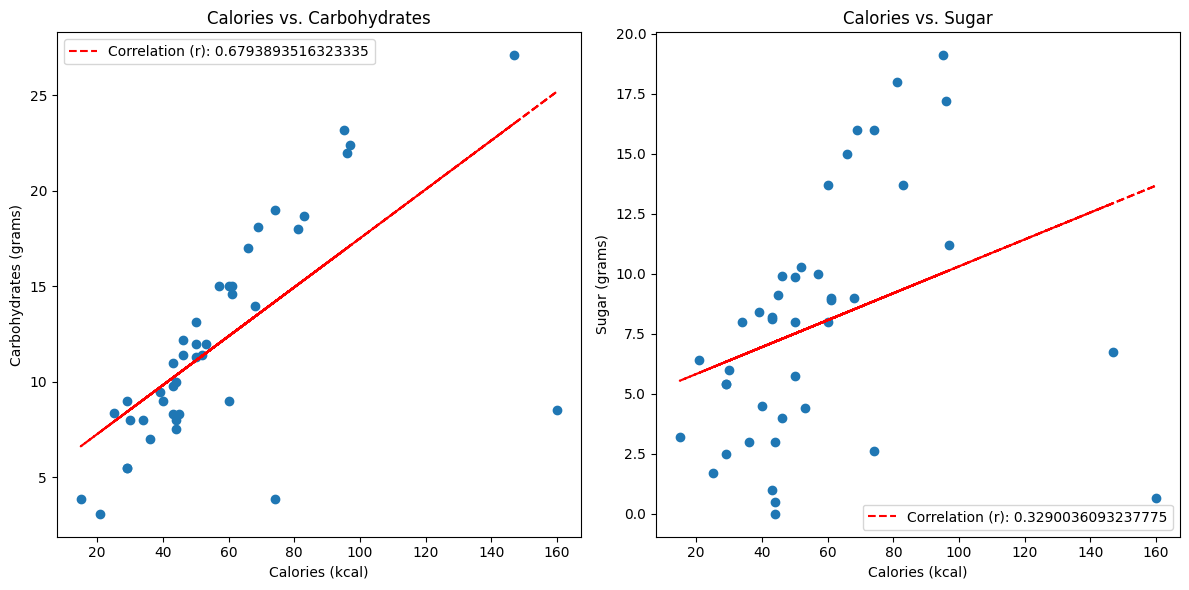

Select an option:
a) Calories vs. Carbohydrates and Calories vs. Sugar
b) Calories vs. Fat and Carbohydrates vs. Sugar 
q) Quit


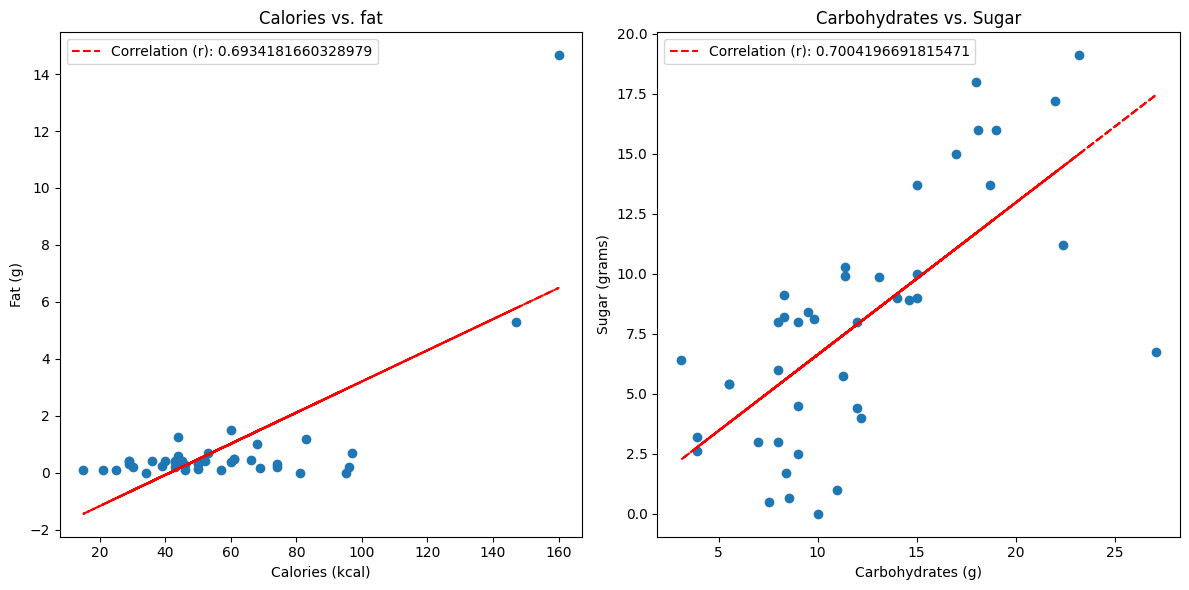

Select an option:
a) Calories vs. Carbohydrates and Calories vs. Sugar
b) Calories vs. Fat and Carbohydrates vs. Sugar 
q) Quit


In [93]:
# Function to plot nutritional values
def plot_nutrition_subplots(option):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    if option == 'a':    
        option_a(fig, axes)
    
    elif option == 'b':
        option_b(fig, axes)
    else:
        print("Invalid option")
        return
    plt.tight_layout()
    plt.show()

# User menu
while True:
    print("Select an option:")
    print("a) Calories vs. Carbohydrates and Calories vs. Sugar")
    print("b) Calories vs. Fat and Carbohydrates vs. Sugar " )
    print("q) Quit")

    choice = input("Enter your choice: ").lower()

    if choice == 'q':
        break
    else:
        plot_nutrition_subplots(choice)

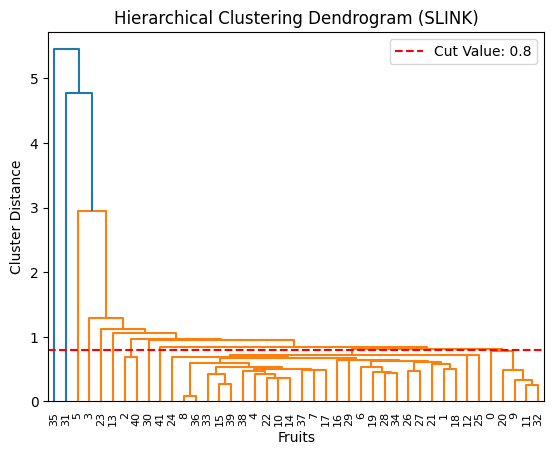

Cluster 1:

                 name  nutritions.calories  nutritions.fat  nutritions.sugar  \
cluster                                                                        
1       2      Banana                   96             0.2              17.2   
        40  Jackfruit                   95             0.0              19.1   

            nutritions.carbohydrates  nutritions.protein  
cluster                                                   
1       2                       22.0                1.00  
        40                      23.2                1.72  
Cluster 2:

                   name  nutritions.calories  nutritions.fat  \
cluster                                                        
2       22        Apple                   52            0.40   
        24      Apricot                   15            0.10   
        6    Blackberry                   40            0.40   
        21    Blueberry                   29            0.40   
        38       Cherry            

In [83]:
# We will Perform cluster analysis to group fruits with similar nutritional profiles. 
# We will use the Agglomerative Hierarchial Clustering approach

# Select relevant attributes for clustering
attributes = ['nutritions.calories', 'nutritions.fat', 'nutritions.sugar', 'nutritions.carbohydrates', 'nutritions.protein']
dataset = df[attributes]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataset)

# Calculate linkage matrix using Complete Linkage (SLINK)
linkage_matrix = linkage(scaled_data, method='single') # For CLINK, change method='single'

# Plot the dendrogram
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram (SLINK)')
plt.xlabel('Fruits')
plt.ylabel('Cluster Distance')

# Ask the user if they want to cut the dendrogram
user_choice = input("Do you want to cut the dendrogram? (Yes/No): ")

# Process user choice
if user_choice.lower() in ['yes', 'y']:
    # Allow user to input a distance threshold
    user_input = input("Enter the distance threshold: ")
    cut_value = float(user_input) if '.' in user_input else int(user_input)

    # Draw a horizontal line on the plot to visualize the cut
    plt.axhline(y=cut_value, color='r', linestyle='--', label=f'Cut Value: {cut_value}')
    plt.legend()
    plt.show()

    # Use fcluster to assign cluster labels based on the cut value
    cluster_labels = fcluster(linkage_matrix, t=cut_value, criterion='distance')

    # Add cluster labels to the DataFrame
    df['cluster'] = cluster_labels

    # Print cluster details in sorted order
    sorted_clusters = df.groupby('cluster').apply(lambda x: x.sort_values(by='name'))
    for cluster in sorted_clusters['cluster'].unique():
        cluster_data = sorted_clusters[sorted_clusters['cluster'] == cluster]
        print(f"Cluster {cluster}:\n")
        print(cluster_data[['name'] + attributes])
        print("=" * 50)
else:
    plt.show()


In [89]:
# Calculating the Cophenetic Correlation Coefficient

# Calculate cophenetic distances
cophenetic_distances = hierarchy.cophenet(linkage_matrix)
# Calculate cophenetic correlation coefficient
cpcc = hierarchy.cophenet(linkage_matrix)[0]
print("Cophenetic Correlation Coefficient:", cpcc)

Cophenetic Correlation Coefficient: 0.8185084959933931
